# dicision tree
결정 트리는 스무고개와 비슷한 머신러닝 기법으로 
날개가 있는가? 혹은 다리가 2개 이상인가? 와 같은 물음에 예 아니오로 대답하여 최종 분류값에 다다르는 형태이다.

다만 인간처럼 구체적인 질문을 만드는 것이 아니라 feature값이 특정 값 a에 대해 크기 비교를 통해 이루어 진다. (a를 학습하는 것이라 생각하면 될듯?)


In [2]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
x_train, x_test , y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)

print("train set acc = :{:.3f}".format(tree.score(x_train,y_train)))
print("test set acc = :{:.3f}".format(tree.score(x_test,y_test)))

train set acc = :1.000
test set acc = :0.937


결정 트리의 가장 큰 문제는 규제를 하지 않으면 오버핏팅이 된다는 것이다.

모든 학습 데이터를 트리로 잘게 잘게 쪼개 버리기 때문에 학습 성능은 굉장히 높으나 일반화가 잘 이루어 지지 않아 오버핏팅이 되는것.

이를 해결하기 위해서는 규제를 해주어야 하는데 규제 방법은 다음과 같다.

바로 트리의 수를 제한하는 방법.

In [3]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
x_train, x_test , y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

#max_depth를 제한하여 일반화 성능을 올리기
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(x_train,y_train)

print("train set acc = :{:.3f}".format(tree.score(x_train,y_train)))
print("test set acc = :{:.3f}".format(tree.score(x_test,y_test)))

train set acc = :0.988
test set acc = :0.951


# 트리 시각화 하기

In [21]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

cancer = load_breast_cancer()
x_train, x_test , y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

#max_depth를 제한하여 일반화 성능을 올리기
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(x_train,y_train)

export_graphviz(tree, out_file = "tree.dot",class_names=["positive","negative"], feature_name =cancer.feature_names,\
                impurity=False,filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

TypeError: export_graphviz() got an unexpected keyword argument 'feature_name'

# Feature importance 트리의 특성 중요도
트리 자체를 시각화 하기엔 너무 복잡하고 보기 어려움. -> 트리가 어떻게 동작하는지 요약하는 속성들을 사용 

#### feature importance 특성 중요도 : 값이 0~1사이의 숫자로 0에 가까울 수록 사용하지 않은 특성 1일 수록 타깃 클래스를 잘 예측함을 의미


feature importance : 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


(-1, 30)

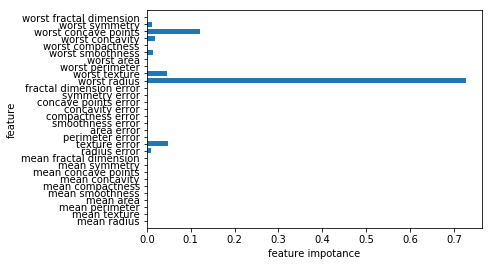

In [3]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
x_train, x_test , y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

#max_depth를 제한하여 일반화 성능을 올리기
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(x_train,y_train)

#feature importance value의 총 합은 1이다.
print("feature importance : \n{}".format(tree.feature_importances_))

n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel("feature impotance")
plt.ylabel("feature")
plt.ylim(-1,n_features)
